In [18]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


pd.set_option('display.max_columns', None)

d1 = pd.read_csv("student-mat.csv", sep=";")
d2 = pd.read_csv("student-por.csv", sep=";")

d3 = pd.merge(d1, d2, on=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])


# Análise Descritiva "Desempenho do Aluno"

## O que é a  base de dados "Desempenho do Aluno" ?
A base trata do desempenho dos alunos no ensino secundário de duas escolas portuguesas, ela trata dos mais diversos dados que permeiam esse assunto, como características demográficas, sociais dentre outros e a mais importante que é o "registro do desempenho" desses alunos as suas *notas*.

## De onde vem esses dados?
Eles foram colhidos através de relatórios escolares e questionários. E após um longo trabalho Paulo Cortez consegui criar e publicar está belíssima base de dados que vamos analizar ao longo desta análise.

## O que buscamos com essa análise descritiva?
Nela vamos buscar um entendimento dos dados e com o entendimento vamos traçar alguns dados que interagem entre si em busca de retirar desse encontro de dados uma *informação*.


# Dicionário de dados

Nome | Descrição | Tipo No BigQuery 
:---|:---|:---|
1 school | escola do aluno (binário: 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira) | STRING
2 sex | sexo do aluno (binário: 'F' - feminino ou 'M' - masculino) | STRING
3 age | idade do aluno (numérica: de 15 a 22 anos) | INT64
4 address | tipo de endereço residencial do aluno (binário: 'U' - urbano ou 'R' - rural) | STRING
5 famsize | tamanho da família (binário: 'LE3' - menor ou igual a 3 ou 'GT3' - maior que 3) | STRING
6 Pstatus | estado de coabitação dos pais (binário: 'T' - viver junto ou 'A' - separado) | STRING
7 Medu | escolaridade materna (numérica: 0 - nenhuma, 1 - ensino fundamental (4ª série), 2 - 5ª a 9ª série, 3 - ensino médio ou 4 - ensino superior) | INT64
8 Fedu | escolaridade paterna (numérica: 0 - nenhuma, 1 - ensino primário (4.ª série), 2 - 5.ª a 9.ª série, 3 - ensino secundário ou 4 - ensino superior)| INT64
9 Mjob | trabalho materno (nominal: «professor», «saúde», «serviços» civis (por exemplo, administrativos ou policiais), «at_home» ou «outros») | STRING
10 Fjob | trabalho do pai (nominal: «professor», «saúde», «serviços» civis (por exemplo, administrativos ou policiais), «at_home» ou «outros») | STRING
11 reason | razão para escolher esta escola (nominal: perto de 'casa', escola 'reputação', 'curso' preferência ou 'outro')| INT64
12 guardian | tutor do aluno (nominal: 'mãe', 'pai' ou 'outro')| STRING 
13 traveltime | Home to School Tempo de viagem (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, ou 4 - >1 hora) | INT64
14 studytime | tempo de estudo semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas)|INT64
15 failures | número de reprovações de classe passadas (numérico: n se 1<=n<3, senão 4)|INT64
16 schoolsup | apoio educacional extra (binário: sim ou não)| STRING
17 Famsup | Apoio Educacional Familiar (binário: Sim ou Não)|STRING
18 paid | aulas extras pagas dentro da disciplina do curso (Matemática ou Português) (binário: sim ou não)|STRING
19 activities | atividades extracurriculares (binário: sim ou não)|STRING
20 nursery | frequentou creche (binário: sim ou não)|STRING
21 higher | quer cursar o ensino superior (binário: sim ou não)|STRING
22 internet | Acesso à Internet em casa (binário: sim ou não)|STRING
23 romantic | com um relacionamento romântico (binário: sim ou não)|STRING
24 famrel | qualidade das relações familiares (numérico: de 1 - muito ruim a 5 - excelente)|INT64
25 freetime | tempo livre após a escola (numérico: de 1 - muito baixo a 5 - muito alto)|INT64
26 goout | sair com os amigos (numérico: de 1 - muito baixo para 5 - muito alto)|INT64
27 Dalc | consumo de álcool na jornada de trabalho (numérico: de 1 - muito baixo a 5 - muito alto)|INT64
28 Walc | consumo de álcool no fim de semana (numérico: de 1 - muito baixo a 5 - muito alto)|INT64
29 health | estado de saúde atual (numérico: de 1 - muito ruim a 5 - muito bom)|INT64
30 absences | número de faltas escolares (numéricas: de 0 a 93)|INT64

# As notas estão relacionadas com as disciplinas de Matemática e Português:

Nome | Descrição | Tipo No BigQuery 
:---|:---|:---|
31 G1 | série do primeiro período (numérica: de 0 a 20)|INT64
31 G2 | segundo período (numérico: de 0 a 20)|INT64
32 G3 | nota final (numérica: de 0 a 20, meta de saída)|INT64

# Sobre a escola Gabriel Pereira:

A Escola Gabriel Pereira é um agrupamento de escolas localizado em Évora, Portugal. Foi fundada em 1919 e é conhecida por oferecer ensino técnico e profissionalizante. O agrupamento tem um Centro Qualifica que visa melhorar os níveis de educação e formação de adultos, contribuindo para a melhoria dos níveis de qualificação da população e a melhoria da sua empregabilidade.

Origem: 
 Gabriel Pereira | AEGP - Agrupamento de Escolas Gabriel Pereira. https://aegp.edu.pt/web/pt-pt/gabriel-pereira.
 Missão – Centro Qualifica AEGP. https://www.qualifica.aegp.edu.pt/introducao/.
 Gabriel Pereira – Wikipédia, a enciclopédia livre. https://pt.wikipedia.org/wiki/Gabriel_Pereira.
 Página Inicial. https://aegp.edu.pt/web/pt-pt.

# Dados da escola Gabriel Pereira
## Matemática 

In [19]:
d1gp = d1[d1['school']== 'GP']
d1gp.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


# Dados da escola Gabriel Pereira
## Português

In [20]:
d2gp = d2[d2['school']== 'GP']
d2gp.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


# Dados da escola Gabriel Pereira
## Português e Matemática

In [21]:
d3gp = d3[d3['school']== 'GP']
d3gp.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_x,traveltime_x,studytime_x,failures_x,schoolsup_x,famsup_x,paid_x,activities_x,nursery,higher_x,internet,romantic_x,famrel_x,freetime_x,goout_x,Dalc_x,Walc_x,health_x,absences_x,G1_x,G2_x,G3_x,guardian_y,traveltime_y,studytime_y,failures_y,schoolsup_y,famsup_y,paid_y,activities_y,higher_y,romantic_y,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15,mother,1,2,0,no,yes,no,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11,mother,1,2,0,no,no,no,no,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6,mother,2,2,0,yes,yes,no,no,yes,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19,mother,1,2,0,no,yes,no,no,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15,mother,1,2,0,no,yes,no,yes,yes,no,5,5,1,1,1,5,0,12,12,13


# GRÁFICO DE CALOR
## Ambas matérias (para uma visão geral)

In [22]:
# grafico de calor

In [23]:
d33 = d1.select_dtypes(exclude='object')
d33 = d33

In [24]:
d33.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


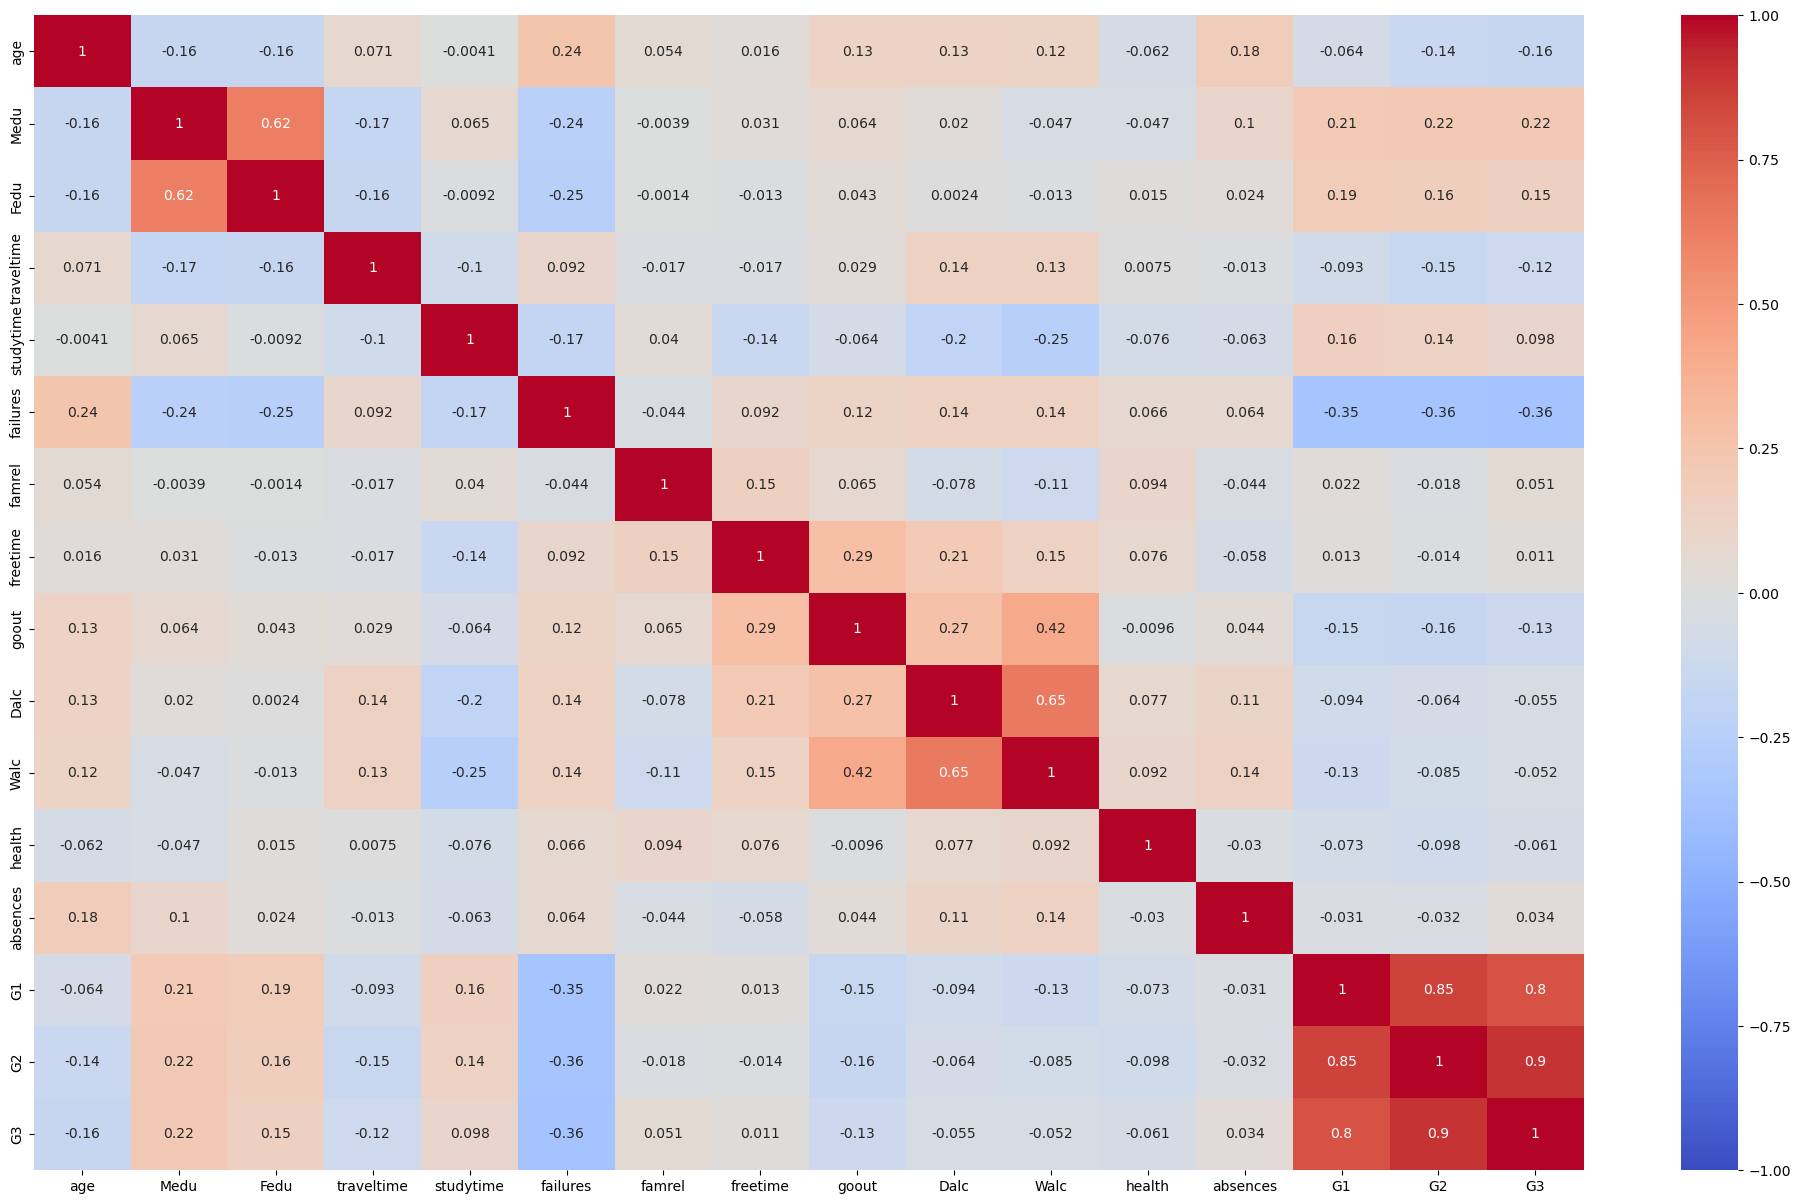

In [44]:
%matplotlib inline

plt.figure(figsize=(25, 15))


sns.heatmap(d33.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm")

plt.show()

# A escolaridade dos pais influência no objetivo de escolaridade dos filhos?


## Grafico de escolaridade materna, paterna e a perspectiva de cursar o ensino superior 

In [26]:
d3.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_x,traveltime_x,studytime_x,failures_x,schoolsup_x,famsup_x,paid_x,activities_x,nursery,higher_x,internet,romantic_x,famrel_x,freetime_x,goout_x,Dalc_x,Walc_x,health_x,absences_x,G1_x,G2_x,G3_x,guardian_y,traveltime_y,studytime_y,failures_y,schoolsup_y,famsup_y,paid_y,activities_y,higher_y,romantic_y,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13


In [27]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        382 non-null    object
 1   sex           382 non-null    object
 2   age           382 non-null    int64 
 3   address       382 non-null    object
 4   famsize       382 non-null    object
 5   Pstatus       382 non-null    object
 6   Medu          382 non-null    int64 
 7   Fedu          382 non-null    int64 
 8   Mjob          382 non-null    object
 9   Fjob          382 non-null    object
 10  reason        382 non-null    object
 11  guardian_x    382 non-null    object
 12  traveltime_x  382 non-null    int64 
 13  studytime_x   382 non-null    int64 
 14  failures_x    382 non-null    int64 
 15  schoolsup_x   382 non-null    object
 16  famsup_x      382 non-null    object
 17  paid_x        382 non-null    object
 18  activities_x  382 non-null    object
 19  nursery 

In [28]:
d3.describe()

,age,Medu,Fedu,traveltime_x,studytime_x,failures_x,famrel_x,freetime_x,goout_x,Dalc_x,Walc_x,health_x,absences_x,G1_x,G2_x,G3_x,traveltime_y,studytime_y,failures_y,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,2.280105,3.578534,5.319372,10.861257,10.712042,10.387435,1.445026,2.039267,0.141361,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,1.282866,1.400360,7.625251,3.349167,3.832560,4.687242,0.699354,0.845571,0.513253,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.250000,8.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.500000,11.000000,11.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


# No gráfico a baixo vamos ver o impacto do nivel de escolariadade dos pais na decisão dos filhos quererem cursar o esino superior ou não
## Como um spoiler positivo, vamos entender melhor os motivos do que vamos ver no gráfico abaixo
## A escolaridade dos pais pode ter uma influência significativa na decisão dos filhos de cursar ou não o ensino superior por várias razões:

1. **Modelo a seguir**: Os pais que têm um alto nível de escolaridade podem servir como um modelo para seus filhos, incentivando-os a buscar o mesmo nível de educação¹³⁴.
2. **Recursos e apoio**: Pais com maior escolaridade podem ter mais recursos (como dinheiro e tempo) e conhecimento para apoiar a educação de seus filhos. Eles podem ser mais capazes de ajudar com a lição de casa, preparar para exames, e entender o sistema educacional²⁴.
3. **Expectativas**: Pais com maior escolaridade podem ter expectativas mais altas para a educação de seus filhos, o que pode motivar os filhos a buscar o ensino superior¹³.
4. **Ambiente de aprendizagem em casa**: Pais com maior escolaridade podem criar um ambiente doméstico que valoriza a educação, o que pode encorajar os filhos a buscar o ensino superior¹³.

Entender essa influência pode ser **útil para desenvolver políticas e programas que apoiam estudantes cujos pais têm baixa escolaridade**, ajudando a garantir que todos os estudantes tenham a oportunidade de buscar o ensino superior se desejarem.

Origem:
 O papel dos pais e as influências externas na educação dos filhos. http://pepsic.bvsalud.org/scielo.php?script=sci_arttext&pid=S1677-29702015000100005.
 Escolarização dos pais é decisiva no nível educacional dos filhos, diz .... https://educacao.uol.com.br/noticias/2017/12/15/so-46-dos-filhos-de-pais-sem-ensino-fundamental-tem-diploma-no-brasil.htm.
 Escolaridade e renda dos pais influenciam carreira dos filhos ... - Iseed. https://www.iseed-faved.com.br/noticias/36-escolaridade-e-renda-dos-pais-influenciam-carreira-dos-filhos-diz-ibge.
 IBGE aponta importância da estrutura familiar na educação. https://g1.globo.com/jornal-nacional/noticia/2016/11/ibge-aponta-importancia-da-estrutura-familiar-na-educacao.html.
 Escolaridade dos pais influencia na renda dos filhos. https://cursoevidente.com.br/blog/escolaridade-dos-pais-influencia-na-renda-dos-filhos/2016/328/.


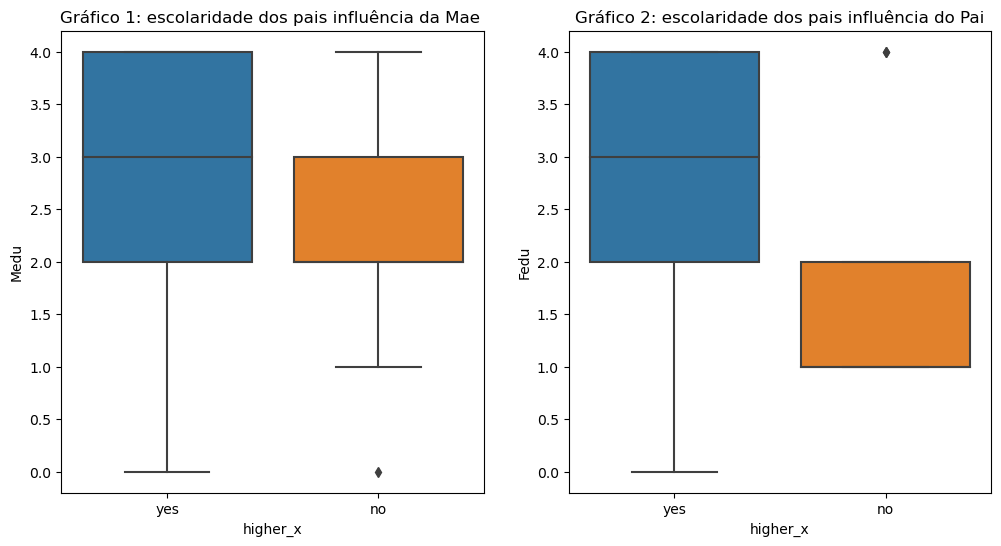

In [29]:
dgp = d3[d3['school'] == 'GP']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Primeiro gráfico
sns.boxplot(data=dgp,x='higher_x', y='Medu', ax=axs[0])
axs[0].set_title('Gráfico 1: escolaridade dos pais influência da Mae ')

# Segundo gráfico
sns.boxplot(data = dgp,x='higher_x', y ='Fedu', ax=axs[1])
axs[1].set_title('Gráfico 2: escolaridade dos pais influência do Pai')

plt.show()


## Como lemos esse boxplot


<br>

###  escolaridade materna (numérica: 0 - nenhuma, 1 - ensino fundamental (4ª série), 2 - 5ª a 9ª série, 3 - ensino médio ou 4 - ensino superior) 


###  escolaridade paterna (numérica: 0 - nenhuma, 1 - ensino primário (4.ª série), 2 - 5.ª a 9.ª série, 3 - ensino secundário ou 4 - ensino superior)


<br>

__1. Quartis:__ as bordas do boxplot representam o 1º e 3º quartis da variável. Enquanto isso, a linha no meio representa a mediana.

<br>

__2. Mínimo e máximo:__ as duas linhas logo no final do boxplot nos informam o valor mínimo e máximo da variável.

<br>

__3. Outliers:__ qualquer ponto que esteja fora do mínimo e do máximo é considerado um outlier.

<br>

Analisando o boxplot acima, observe que os alunos cujo os pais tem escolaridade acima da  media, tem mais tendencia a fazer o ensino superior

<br>

In [30]:
#trabalho x escolaridade do pai e da mae

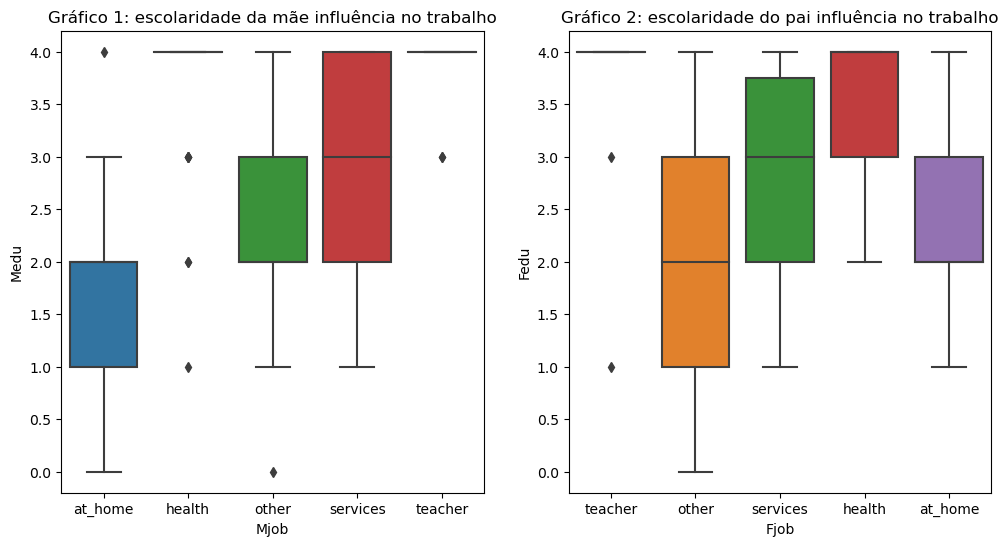

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=dgp,x='Mjob', y='Medu', ax=axs[0])
axs[0].set_title('Gráfico 1: escolaridade da mãe influência no trabalho')

# Segundo gráfico
sns.boxplot(data = dgp,x='Fjob', y ='Fedu', ax=axs[1])
axs[1].set_title('Gráfico 2: escolaridade do pai influência no trabalho')

plt.show()



### trabalho materno (nominal: «professor», «saúde», «serviços» civis (por exemplo, administrativos ou policiais), «at_home» ou «outros»)

### trabalho do pai (nominal: «professor», «saúde», «serviços» civis (por exemplo, administrativos ou policiais), «at_home» ou «outros»)

# Vamos entender o porque o grafico acima é importante os motivos que levam a ele

## Pessoas com ensino superior tendem a trabalhar em cargos diferentes daqueles que não têm ensino superior por várias razões:

1. **Habilidades Específicas**: Muitos cargos exigem habilidades e conhecimentos específicos que são adquiridos através de um diploma de ensino superior¹².
2. **Requisitos do Trabalho**: Alguns empregadores podem exigir um diploma de ensino superior para determinados cargos como uma forma de garantir que os candidatos tenham um certo nível de conhecimento ou habilidade¹².
3. **Empregabilidade**: A graduação pode aumentar a empregabilidade, permitindo o acesso a melhores salários e a construção de currículos mais fortes⁴.

Saber disso é **interessante porque pode ajudar indivíduos a tomar decisões informadas sobre sua educação e carreira. Por exemplo, se alguém aspira a um determinado cargo que requer um diploma de ensino superior, saber disso pode incentivá-lo a buscar essa educação.** Além disso, entender essa dinâmica pode informar políticas públicas e práticas de contratação.

Origem:
 O impacto do ensino superior no mercado de trabalho do futuro. https://desafiosdaeducacao.com.br/impacto-do-ensino-superior-no-mercado-de-trabalho/.
 A influência do grau de escolaridade no mercado de trabalho - Minuto News. https://blog.unifil.br/mercado-de-trabalho-a-influencia-do-grau-de-escolaridade-no-fator-cargos-e-salarios/.
 Qual a importância da graduação para o mercado de trabalho?. https://g1.globo.com/rj/sul-do-rio-costa-verde/especial-publicitario/aedb/noticia/2021/02/26/qual-a-importancia-da-graduacao-para-o-mercado-de-trabalho.ghtml.
 Qual a importância da graduação para o mercado de trabalho?. https://bing.com/search?q=influ%c3%aancia+do+ensino+superior+no+mercado+de+trabalho.



# Quem sai mais, bebe mais? 
## Vamos entender o porque disso com a ajuda do texto e o grafico abaixo!

## Existem várias razões pelas quais você pode querer entender a relação entre sair com amigos e o consumo de álcool na adolescência:

1. **Pressão dos pares**: A pressão do grupo de amigos pode influenciar o consumo de álcool. Adolescentes podem se sentir compelidos a beber para se encaixar ou serem aceitos pelo grupo¹²⁴.
2. **Exposição ao álcool**: Sair com amigos pode aumentar a exposição ao álcool, especialmente em festas ou eventos sociais¹⁵.
3. **Comportamento de risco**: O consumo de álcool na adolescência está associado a uma série de comportamentos de risco, como envolvimento em acidentes e violência¹⁶.

## Quanto aos motivos pelos quais o consumo de álcool na adolescência não é recomendado:

1. **Desenvolvimento cerebral**: O cérebro continua a se desenvolver até os 20 anos de idade e o consumo de álcool pode interferir nesse processo, prejudicando a memória, o aprendizado e o controle dos impulsos⁶.
2. **Riscos à saúde**: O consumo de álcool na adolescência aumenta o risco de dependência futura e está associado a uma série de problemas de saúde, incluindo doenças do fígado e problemas psicológicos⁵⁶.
3. **Desempenho acadêmico**: O consumo de álcool pode levar a uma queda no desempenho escolar⁶.

Entender a relação entre sair com amigos e o consumo de álcool **pode ajudar a desenvolver estratégias de prevenção e intervenção mais eficazes.** Por exemplo, programas de educação sobre álcool podem incluir componentes sobre a pressão dos pares. Além disso, os pais podem ser encorajados a monitorar as atividades sociais de seus filhos e a discutir os riscos do consumo de álcool.

Origem: conversa com o Bing, 20/11/2023
 A influência das relações e o uso de álcool por adolescentes*. http://pepsic.bvsalud.org/scielo.php?script=sci_arttext&pid=S1806-69762018000100002.
 A influência dos amigos no consumo de drogas entre adolescentes. https://www.scielo.br/j/estpsi/a/MvH6GVHMmy9TfrdCfhvRqNP/.
 Alcoolismo na adolescência | Entrevista | Drauzio Varella. https://drauziovarella.uol.com.br/entrevistas-2/alcoolismo-na-adolescencia-entrevista/.
 Os riscos do consumo de álcool na adolescência. https://fcmsantacasasp.edu.br/os-riscos-do-consumo-de-alcool-na-adolescencia/.
 SciELO - Brazil - Uso de álcool entre adolescentes: conceitos .... https://www.scielo.br/j/rbp/a/V6Ptzt3W73RGSJ6k7jPMv4r.
 Alcoolismo na adolescência | Entrevista | Drauzio Varella. https://bing.com/search?q=rela%c3%a7%c3%a3o+entre+sair+com+amigos+e+consumo+de+%c3%a1lcool+na+adolesc%c3%aancia.
 Serie Álcool - Álcool e adolescência - OPAS/OMS - PAHO. https://www.paho.org/pt/documentos/serie-alcool-alcool-e-adolescencia.
 undefined. http://dx.doi.org/10.11606/issn.1806-6976.smad.2018.000357.
 undefined. https://doi.org/10.1590/0103-166X2014000100007.
 undefined. https://doi.org/10.1590/S1516-44462004000500005.


In [32]:
# grafico Walc -x e o goout -y

<Axes: xlabel='Walc_x', ylabel='goout_x'>

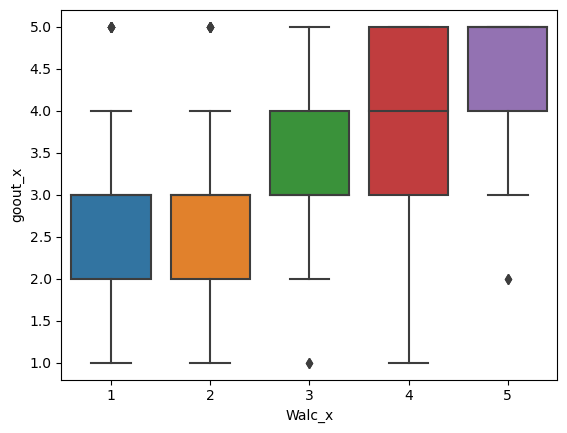

In [33]:
sns.boxplot(data=dgp,x='Walc_x', y='goout_x')


### Walc	consumo de álcool no fim de semana (numérico: de 1 - muito baixo a 5 - muito alto)

### goout	sair com os amigos (numérico: de 1 - muito baixo para 5 - muito alto)

# Quem tem um bom relacionamento com a família tem mais chances de cursar o ensino superior?
## E vamos novamente de mais um bom spoiler!

A relação familiar pode ter uma influência significativa na decisão dos filhos de cursar ou não o ensino superior por várias razões:

1. **Ambiente de Aprendizagem**: Uma boa relação familiar pode criar um ambiente de aprendizagem positivo em casa, o que pode encorajar os filhos a buscar o ensino superior¹⁴⁵.
2. **Apoio Emocional**: Uma boa relação familiar pode fornecer o apoio emocional necessário para os filhos enfrentarem os desafios do ensino superior¹².
3. **Modelo a Seguir**: Os pais podem servir como modelos para seus filhos, incentivando-os a buscar o mesmo nível de educação¹.
4. **Desenvolvimento da Autoconfiança**: A educação no contexto familiar influencia no desenvolvimento da autoconfiança da criança, o que pode motivá-la a buscar o ensino superior⁵.

Entender essa influência pode ser **útil para desenvolver políticas e programas que apoiam estudantes de famílias com diferentes estruturas e dinâmicas, ajudando a garantir que todos os estudantes tenham a oportunidade de buscar o ensino superior** se desejarem.

Origem:
 A IMPORTÂNCIA DA FAMÍLIA PARA O DESENVOLVIMENTO INFANTIL E PARA O .... https://uniesp.edu.br/sites/_biblioteca/revistas/20200522115524.pdf.
 A importância da relação família e escola - Brasil Escola. https://meuartigo.brasilescola.uol.com.br/educacao/a-importancia-da-relacao-familia-e-escola.htm.
 A IMPORTÂNCIA DA RELAÇÃO ESCOLA-FAMÍLIA - Pedagogia ao Pé da Letra. https://pedagogiaaopedaletra.com/a-importancia-da-relacao-escola-familia/.
 Relação pais e filhos: compreendendo o interjogo das ... - SciELO. https://www.scielo.br/j/er/a/j6fqkKb6qYv834qTxy4HXFy/.
 IBGE aponta importância da estrutura familiar na educação. https://g1.globo.com/jornal-nacional/noticia/2016/11/ibge-aponta-importancia-da-estrutura-familiar-na-educacao.html.
 undefined. https://doi.org/10.1590/0104-4060.44615.

<Axes: xlabel='higher_x', ylabel='famrel_x'>

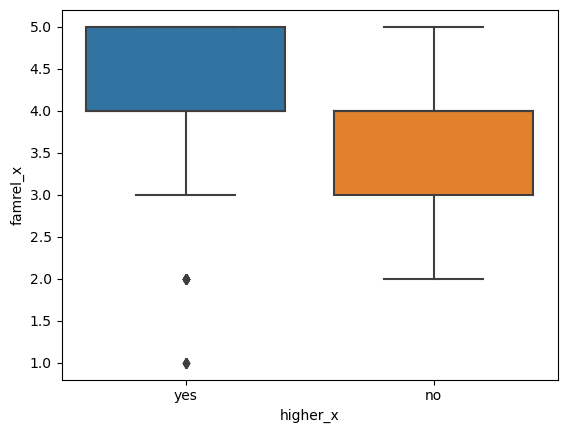

In [34]:
sns.boxplot(data=dgp,y='famrel_x', x='higher_x')


### famrel	qualidade das relações familiares (numérico: de 1 - muito ruim a 5 - excelente)

 ### higher 	quer cursar o ensino superior (binário: sim ou não)

# Porque escolhemos a escola Gabriel Pereira em Portugal?

A Escola Gabriel Pereira, localizada em Évora, Portugal, **é uma instituição de ensino com uma rica história e um forte compromisso com a educação** . Realizar um trabalho sobre esta escola pode proporcionar uma visão única sobre o sistema educacional português, as práticas pedagógicas e a evolução da educação ao longo do tempo. Além disso, pode-se explorar como a escola se adapta às mudanças sociais e tecnológicas para atender às necessidades dos alunos no século XXI¹.

Origem: conversa com o Bing, 20/11/2023
 Gabriel Pereira | AEGP - Agrupamento de Escolas Gabriel Pereira. https://aegp.edu.pt/web/pt-pt/gabriel-pereira.)
 Missão – Centro Qualifica AEGP. https://www.qualifica.aegp.edu.pt/introducao/.
 Página Inicial. https://aegp.edu.pt/web/pt-pt.
 Gabriel Pereira – Wikipédia, a enciclopédia livre. https://pt.wikipedia.org/wiki/Gabriel_Pereira.

# CONCLUSÕES:
## QUAIS OS IMPACTOS DA FAMILIA EM CURSAR O ENSINO SUPERIOR?
Ao longo deste trabalho citamos a importancia da familia em cursar o ensino superior, vamos rever um pouco a importancia disso.

**Impactos da família em um jovem querer cursar o ensino superior:**
A família desempenha um papel crucial na aspiração dos alunos de cursar o ensino superior. Três características se destacam em termos de aspirações de continuidade de estudos: sexo, renda familiar e incentivo da família¹. Além disso, alunos cujas famílias possuem capital cultural e renda mais elevados, cujos pais podem ajudá-los economicamente a cursar a universidade, têm maior probabilidade de considerar importante cursar a universidade¹. De acordo com uma reportagem do G1, muitos jovens adiaram o ingresso ao ensino superior ou temem ter de desistir da graduação após dificuldades impostas pela Covid-19¹.

## QUAIS OS RISCOS QUE UM JOVEM CORRE AO BEBER E PORQUE ELE BEBE MESMO COM ESSES RISCOS?
Como vimos anteriormente, quem sai mais com os amigos bebe mais, vamso ver um pouco mais os riscos de beber enquanto jovem,

**Riscos que um jovem corre ao beber e por que ele bebe mesmo com esses riscos:**
Os jovens que começam a beber aos 14 anos têm probabilidade quatro vezes maior de apresentar dependência alcoólica do que aqueles que iniciam o consumo após os 21 anos de idade⁸. O consumo excessivo de álcool pode levar a alterações hepáticas, ganho de peso, enrijecimento das artérias e aumento das chances de um AVC⁹. Além disso, essas pessoas acabam se expondo a mais situações de risco, como acidentes de trânsito, sexo sem proteção e brigas, além de correr um risco maior de infarto agudo do miocárdio e overdose alcóolica, o que pode até mesmo levar ao coma e à morte⁷.

## QUAIS OS BENEFICIOS DE CURSAR O ENSINO SUPEIOR?

Como vimos ao longo deste trabalho a fámilia é fundamental para os jovens quererem cursar o ensino superior agora vamos ver os beneficios dele, alem dos citados anteriormente.

**Benefícios de cursar o ensino superior:**
Cursar o ensino superior traz vários benefícios, incluindo:
1. Preparação para o mercado de trabalho[^10^].
2. Diferencial competitivo¹¹.
3. Oportunidades de carreira¹¹.
4. Melhor remuneração¹¹.
5. Conhecimento e experiência¹¹.
6. Crescimento pessoal¹¹.
7. Maior valorização pelo mercado¹².
8. Maior índice de empregabilidade¹².
9. Melhores salários¹².
10. Currículos ricos em competências, habilidades e conhecimentos técnicos¹².
11. Ampliação do leque de oportunidades profissionais¹².

Origem: 
‘Depois de tanta luta, precisei abrir mão da vaga na ... - G1. https://g1.globo.com/educacao/noticia/2021/08/14/impacto-pandemia-ensino-superior.ghtml.
Os riscos do consumo de álcool na adolescência. https://fcmsantacasasp.edu.br/os-riscos-do-consumo-de-alcool-na-adolescencia/.
 Adolescentes que fumam e bebem têm prejuízos à saúde já aos ... - G1. https://g1.globo.com/bemestar/noticia/2018/10/01/adolescentes-que-fumam-e-bebem-tem-prejuizos-a-saude-ja-aos-17-anos-aponta-estudo.ghtml.
 Adolescentes que fumam e bebem têm prejuízos à saúde já aos ... - G1. https://bing.com/search?q=riscos+que+um+jovem+corre+ao+beber+e+porque+ele+bebe+mesmo+com+esses+riscos+not%c3%adcias.
 Conheça 11 benefícios que um curso superior vai trazer pra sua vida. https://noticias.cruzeirodosuleducacional.edu.br/conheca-11-beneficios-que-um-curso-superior-vai-trazer-pra-sua-vida/.
 Ensino superior proporciona vantagens pessoais e profissionais | O ... - G1. https://g1.globo.com/sp/presidente-prudente-regiao/especial-publicitario/unoeste/o-conhecimento-te-transforma/noticia/2020/10/15/ensino-superior-proporciona-vantagens-pessoais-e-profissionais.ghtml.
 A importância do ensino superior: a graduação aumenta suas chances no .... https://faculdadedofuturo.com.br/blog/a-importancia-do-ensino-superior-a-graduacao-aumenta-suas-chances-no-mercado/.
 43% dos aprendizes estão cursando uma faculdade - Notícias R7. https://noticias.r7.com/educacao/43-dos-aprendizes-estao-cursando-uma-faculdade-23032019.
 O Programa Bolsa Família e o acesso e permanência no ensino superior .... https://www.scielo.br/j/rbedu/a/YLHf6rGQFbkrL5Hy3mxSjvz/.
 A jornada do jovem para o Ensino Superior - home-globo. https://gente.globo.com/infografico-a-jornada-do-jovem-para-o-ensino-superior/.
 Consumo de álcool na gestação traz riscos para bebê, afirma médica. https://agenciabrasil.ebc.com.br/saude/noticia/2022-02/consumo-de-alcool-na-gestacao-traz-riscos-para-bebe-afirma-medica.
 Sociedade médica alerta para o risco de consumo de álcool na gravidez. https://agenciabrasil.ebc.com.br/saude/noticia/2021-09/sociedade-medica-alerta-para-o-risco-de-consumo-de-alcool-na-gravidez.
 Por que fazer uma graduação? Confira 7 motivos para ingressar no ensino .... https://g1.globo.com/sao-paulo/sorocaba-jundiai/especial-publicitario/universidade-de-sorocaba/noticia/por-que-fazer-uma-graduacao-confira-7-motivos-para-ingressar-no-ensino-superior.ghtml.